ADF Statistic: -1.8897457626981888
p-value: 0.3369002973899465
ADF Statistic: -32.98424477382368
p-value: 0.0


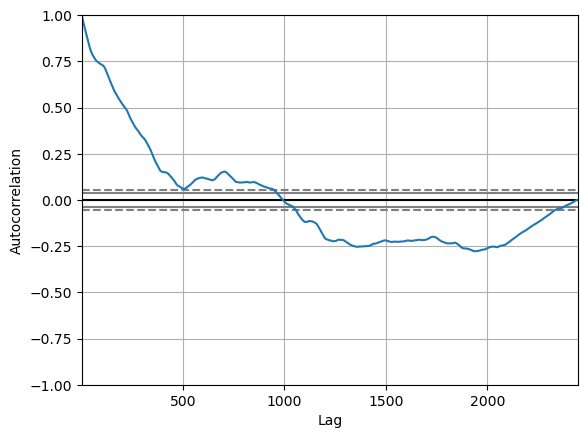

(2447, 1)


/Users/crystalhoo/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/crystalhoo/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/crystalhoo/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/crystalhoo/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency informatio

best value of p: 6


/Users/crystalhoo/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [93]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import yfinance as yf
import itertools
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot

# Fetching stock data from Yahoo Finance

df = pd.read_csv("klse.csv")
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)
df.drop("2023-04-20", axis=0, inplace=True)
df.drop("Dividends", axis=1, inplace=True)
df.drop("Stock Splits", axis=1, inplace=True)

adf_result = adfuller(df["Close"])
adf_statistic = adf_result[0]
p_value = adf_result[1]
print("ADF Statistic:", adf_statistic)
print("p-value:", p_value)

diff_closed = np.diff(df["Close"])
adf_result_diff = adfuller(diff_closed)
adf_statistic_diff = adf_result_diff[0]
p_value_diff = adf_result_diff[1]
print("ADF Statistic:", adf_statistic_diff)
print("p-value:", p_value_diff)

autocorrelation_plot
autocorrelation_plot(df["Close"])
plt.show()

# Preprocessing the data
df = df[['Close']]  # Selecting only the 'Close' column
df = df.dropna()  # Removing any rows with missing values
print(df.shape)

# Splitting the data into train and validation sets
train_data, val_data = train_test_split(df, test_size=0.05, shuffle=False)

# Fitting the ARIMA model
p_values = range(0, 10)
best_aic = float("inf")
best_p = None
for p in p_values:
    model=ARIMA(train_data, order=(p, 1, 2))
    model_fit=model.fit()
    aic=model_fit.aic
    if aic < best_aic:
        best_aic = aic
        best_p = p

print("best value of p:", best_p)


In [94]:
model = ARIMA(train_data, order=(2, 1, 2))  # ARIMA(p, d, q) parameters
model_fit = model.fit()

start_index = len(train_data) + 1
end_index = len(df)

predictions = model_fit.predict(start=start_index, end=end_index)
predictions.index = val_data.index

predictions.head()

/Users/crystalhoo/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/crystalhoo/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/crystalhoo/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/crystalhoo/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an int

Date
2022-10-18 00:00:00+08:00    1388.369215
2022-10-19 00:00:00+08:00    1390.415269
2022-10-20 00:00:00+08:00    1391.852340
2022-10-21 00:00:00+08:00    1392.122031
2022-10-25 00:00:00+08:00    1391.264012
Name: predicted_mean, dtype: float64

In [98]:
import pickle

model_fit.summary()
with open('arima.pkl', 'wb') as file:
    pickle.dump(model, file)

Evaluation Results:
Mean Squared Error (MSE): 5350.519724288473
Root Mean Squared Error (RMSE): 73.14724686745546
Mean Absolute Error (MAE): 67.4228893421434


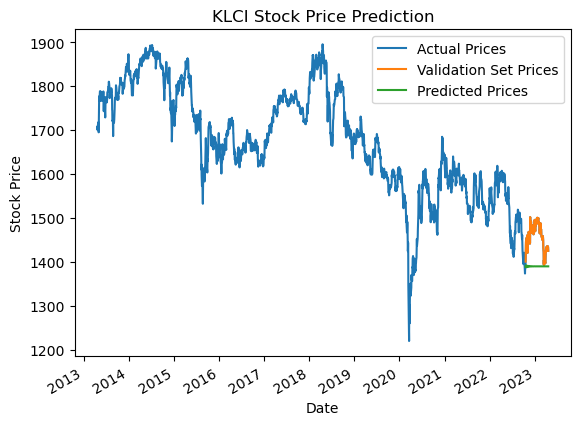

In [95]:
# Evaluating the model
actual_prices = val_data['Close'].values
mse = mean_squared_error(actual_prices, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actual_prices, predictions)

# Printing the evaluation results
print("Evaluation Results:")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

# Plotting the predicted and actual prices
df['Close'].plot(label='Actual Prices')
val_data['Close'].plot(label='Validation Set Prices')
predictions.plot(label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('KLCI Stock Price Prediction')
plt.legend()
plt.show()

In [41]:
val_data.index[0]

Timestamp('2021-04-16 00:00:00+0800', tz='pytz.FixedOffset(480)')

In [43]:
val_data.shape

(490, 1)

In [42]:
val_data.index[-1]

Timestamp('2023-04-19 00:00:00+0800', tz='pytz.FixedOffset(480)')

In [39]:
predictions.head()

Date
2013-04-22 00:00:00+08:00       0.000000
2013-04-23 00:00:00+08:00    1706.682247
2013-04-24 00:00:00+08:00    1700.328724
2013-04-25 00:00:00+08:00    1707.301820
2013-04-26 00:00:00+08:00    1706.350023
Name: predicted_mean, dtype: float64

In [34]:
train_data.head()

,Close
Date,
2013-04-22 00:00:00+08:00,1706.680054
2013-04-23 00:00:00+08:00,1700.390015
2013-04-24 00:00:00+08:00,1707.349976
2013-04-25 00:00:00+08:00,1706.339966
2013-04-26 00:00:00+08:00,1711.290039


In [35]:
train_data.tail() 

,Close
Date,
2021-04-09 00:00:00+08:00,1612.250000
2021-04-12 00:00:00+08:00,1608.420044
2021-04-13 00:00:00+08:00,1597.709961
2021-04-14 00:00:00+08:00,1598.280029
2021-04-15 00:00:00+08:00,1608.250000


In [36]:
val_data.head()

,Close
Date,
2021-04-16 00:00:00+08:00,1608.380005
2021-04-19 00:00:00+08:00,1600.290039
2021-04-20 00:00:00+08:00,1607.569946
2021-04-21 00:00:00+08:00,1596.579956
2021-04-22 00:00:00+08:00,1607.729980


In [37]:
val_data.tail()

,Close
Date,
2023-04-13 00:00:00+08:00,1434.219971
2023-04-14 00:00:00+08:00,1435.130005
2023-04-17 00:00:00+08:00,1434.900024
2023-04-18 00:00:00+08:00,1432.359985
2023-04-19 00:00:00+08:00,1425.069946
